# Table of Contents

## 1. Import Libraries and Data Sets

## 2. Identify variables for exploratory visual analysis

## 3. Create a correlation matrix heatmap

## 4. Creat a scatterplot for variables with the strongest relationships

## 5. Create a Pair Plot of the data set

## 6. Create a categorical plot and interpret the results

## 7. Revisit analysis questions and identify any answers based on the exploration so far

## 8. Define any hypothesis at this point

# 1. Import Libraries and Data Sets

## 1.1 Import libraries

In [1]:
!pip install --upgrade seaborn

In [2]:
# Import all libraries required for the visual exploration analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 1.2 Import data sets

In [3]:
# Create path to import data sets
path = r'/Users/brucehickling/Library/CloudStorage/Dropbox/Courses/CareerFoundry/Data Immersion/6_Advanced Analytics & Dashboard Design/Achievement Project'

In [4]:
# Import data sets from .csv files
df_FIPS_names = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'State_County_FIPS_cleaned.csv'), index_col = 0) 
df_HUD = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'HUD_cleaned.csv'), index_col = 0)
df_gun_FIPS = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'Gun Violence_cleaned.csv'), index_col = 0) 
df_edu = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'Education_cleaned.csv'), index_col = 0)
df_job = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'Unemployment_cleaned.csv'), index_col = 0)

In [5]:
# Import data sets from .pkl files
df_HUD_gun = pd.read_pickle(os.path.join(path, '2_Data', 'Prepared Data', 'HUD_Gun Violence.pkl')) 
df_HUD_edu_job = pd.read_pickle(os.path.join(path, '2_Data', 'Prepared Data', 'HUD_Edu_Unemployed.pkl'))

In [6]:
# Check imported files
df_FIPS_names

,county,state,FIPS Code
0,Autauga County,AL,1001
1,Autauga County,AL,1001
2,Autauga County,AL,1001
3,Autauga County,AL,1001
4,Autauga County,AL,1001
...,...,...,...
52884,St. Croix Island,VI,78010
52885,St. Croix Island,VI,78010
52886,St. Croix Island,VI,78010
52887,St. John Island,VI,78020


In [7]:
df_HUD

,FIPS Code,HAS ACTIVE FINANCING
index,,
0,39041,Y
1,18141,N
2,24510,N
3,18025,N
4,17031,Y
...,...,...
23629,13095,N
23630,48141,N
23631,45033,Y


In [8]:
df_gun_FIPS

,FIPS Code,gun incident ID,date of gun incident
0,42003,461105,2013-01-01
1,6037,460726,2013-01-01
2,39093,478855,2013-01-01
3,8005,478925,2013-01-05
4,37081,478959,2013-01-07
...,...,...,...
231749,53063,1082061,2018-03-31
231750,22069,1083139,2018-03-31
231751,22051,1083151,2018-03-31
231752,48201,1082514,2018-03-31


In [9]:
df_edu

,FIPS Code,"Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,59.5,29.6,6.1,4.9,48.2,33.8,13.2,4.7,36.8,35.7,20.4,7.1,20.9,44.9,23.8,10.4
1,1009,53.9,32.4,8.4,5.3,39.5,34.7,18.8,7.0,29.6,36.0,24.8,9.6,19.5,33.4,34.0,13.1
2,1021,54.0,31.1,8.5,6.5,43.4,32.6,16.5,7.5,33.8,35.8,20.5,9.9,18.2,44.4,24.6,12.7
3,1073,35.3,33.1,15.8,15.8,26.2,28.3,25.7,19.9,19.1,27.9,28.4,24.6,9.9,26.4,30.3,33.4
4,1115,50.1,33.6,9.9,6.4,39.0,32.9,19.6,8.5,28.7,34.6,25.6,11.1,15.4,35.6,32.9,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,53000,22.4,37.4,21.3,19.0,16.2,27.9,33.0,22.9,12.9,24.9,34.4,27.7,8.7,22.0,33.3,36.0
3279,54000,44.0,35.6,10.0,10.4,34.0,36.6,17.0,12.3,24.8,39.4,21.0,14.8,13.1,40.3,26.0,20.6
3280,55000,30.4,40.4,14.4,14.8,21.4,37.1,23.8,17.7,14.9,34.6,28.1,22.4,7.8,30.6,31.5,30.1
3281,56000,22.1,40.0,20.8,17.2,17.0,33.2,31.1,18.8,12.1,31.0,35.0,21.9,6.8,29.1,36.7,27.4


In [10]:
df_job

,FIPS Code,Unemployment_rate_2000,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,Unemployment_rate_2007,Unemployment_rate_2008,...,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,5.4,6.8,7.0,5.9,5.4,4.4,4.2,4.2,6.0,...,8.0,7.2,6.7,6.5,4.5,4.0,3.1,6.6,46,92.6
1,1009,3.5,3.7,5.4,4.6,4.1,3.6,3.2,3.2,4.8,...,6.4,6.1,5.4,5.4,4.2,3.5,2.7,4.1,-90,102.2
2,1021,4.3,4.8,5.1,5.0,4.6,3.9,3.6,3.5,5.2,...,6.7,6.2,5.7,5.5,4.2,3.6,2.7,5.0,28,96.0
3,1073,4.0,4.4,5.2,5.5,5.2,4.4,4.0,3.9,5.6,...,6.8,6.3,5.8,5.7,4.4,3.7,2.9,6.2,111,104.6
4,1115,3.8,4.2,5.1,5.2,4.9,3.9,3.5,3.5,5.2,...,6.2,5.7,5.2,5.2,4.1,3.5,2.7,4.9,123,126.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,51000,2.3,3.3,4.4,4.3,4.1,3.8,3.3,3.3,4.3,...,5.6,5.1,4.4,4.0,3.7,2.9,2.7,6.2,-73,100.0
3270,53000,5.1,6.0,7.1,7.2,6.3,5.6,5.0,4.6,5.2,...,6.6,5.9,5.4,5.2,4.6,4.4,4.1,8.4,82,100.0
3271,54000,5.6,5.4,6.5,6.6,5.8,5.5,5.2,4.8,4.7,...,6.7,6.5,6.6,6.1,5.2,5.2,4.9,8.3,19,100.0
3272,55000,3.4,4.4,5.3,5.6,5.0,4.8,4.7,4.8,4.9,...,6.7,5.3,4.4,3.9,3.3,3.0,3.3,6.3,-79,100.0


In [11]:
# Check merged files
df_HUD_gun.head()

,FIPS Code,HAS ACTIVE FINANCING,gun incident ID,date of gun incident
0,39041,Y,140619,2014-05-30
1,39041,Y,151524,2014-06-27
2,39041,Y,221284,2014-11-08
3,39041,Y,267323,2014-12-22
4,39041,Y,406527,2015-09-02


In [12]:
df_HUD_gun.shape

(17897715, 4)

In [13]:
df_HUD_edu_job.head()

,FIPS Code,HAS ACTIVE FINANCING,"Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990",...,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,39041,Y,25.2,42.9,13.2,18.6,15.6,34.3,23.7,26.4,...,5.3,4.1,3.6,3.6,3.5,3.4,3.2,5.3,-84,187.8
1,39041,N,25.2,42.9,13.2,18.6,15.6,34.3,23.7,26.4,...,5.3,4.1,3.6,3.6,3.5,3.4,3.2,5.3,-84,187.8
2,39041,Y,25.2,42.9,13.2,18.6,15.6,34.3,23.7,26.4,...,5.3,4.1,3.6,3.6,3.5,3.4,3.2,5.3,-84,187.8
3,39041,N,25.2,42.9,13.2,18.6,15.6,34.3,23.7,26.4,...,5.3,4.1,3.6,3.6,3.5,3.4,3.2,5.3,-84,187.8
4,39041,Y,25.2,42.9,13.2,18.6,15.6,34.3,23.7,26.4,...,5.3,4.1,3.6,3.6,3.5,3.4,3.2,5.3,-84,187.8


In [14]:
df_HUD_edu_job.shape

(23324, 41)

# 2. Identify variables for exploratory visual analysis

## 2.1 HUD data set

__The 'HAS ACTIVE FINANCING' is the variable I would like to use from this data set. However, I don't believe it can be used in its current state with 'Y' or 'N' boolean values. I am not sure of the best way to include a boolean, Yes/No variable value in a correlation matrix so I will attempt to use it in several ways:__  

__a) create a variable with the count of listed multifamily assisted properties per FIPS Code,__  

__b) create a variable with the count of listed multifamily assisted properties still receiving financial assistance per FIPS Code,__  

__c) create two different dataframe subset versions: one with the value of the 'HAS ACTIVE FINANCING' variable as 'Y' and one as 'N'to create two separate correlation matrices, and__  

__d) convert the 'Y' and 'N' values to '1' and '0' binary values.__  


### 2.1.1) create a variable for all assisted housing properties in each FIPS Code

In [15]:
# Provide the value count of multifamily assisted housing properties grouped by FIPS Code
df_HUD.groupby('FIPS Code')['HAS ACTIVE FINANCING'].count()

FIPS Code
1001      1
1003     12
1005      3
1007      1
1009      2
         ..
72149     1
72151     2
72153     1
78010    16
78030     1
Name: HAS ACTIVE FINANCING, Length: 2554, dtype: int64

In [16]:
# Create a variable for the assisted housing count
HUD_count = df_HUD.groupby('FIPS Code')['HAS ACTIVE FINANCING'].count().reset_index(name='assisted_housing_count')

In [17]:
HUD_count

,FIPS Code,assisted_housing_count
0,1001,1
1,1003,12
2,1005,3
3,1007,1
4,1009,2
...,...,...
2549,72149,1
2550,72151,2
2551,72153,1
2552,78010,16


### 2.1.2. Create a variable for assisted housing still receiving financing

In [18]:
# Do a boolean count of 'Y' and 'N' values for the 'HAS ACTIVE FINANCING' variable
df_HUD['HAS ACTIVE FINANCING'].value_counts()

HAS ACTIVE FINANCING
Y    12746
N    10852
Name: count, dtype: int64

In [19]:
# Calculate the count of assisted properties still receiving financing grouping by 'FIPS Code'
active_finance = df_HUD.groupby('FIPS Code')['HAS ACTIVE FINANCING'].apply(lambda x: (x == 'Y').sum())

In [20]:
active_finance

FIPS Code
1001      0
1003      7
1005      1
1007      1
1009      0
         ..
72149     1
72151     2
72153     1
78010    10
78030     1
Name: HAS ACTIVE FINANCING, Length: 2554, dtype: int64

In [21]:
# Create a new variable for active HUD financing
active_finance = df_HUD.groupby('FIPS Code')['HAS ACTIVE FINANCING'].apply(lambda x: (x == 'Y').sum()).reset_index(name='active_finance')

In [22]:
active_finance

,FIPS Code,active_finance
0,1001,0
1,1003,7
2,1005,1
3,1007,1
4,1009,0
...,...,...
2549,72149,1
2550,72151,2
2551,72153,1
2552,78010,10


In [23]:
# Merge the two new variables 'assisted_housing_count' and 'active_finance'
df_HUD_count = HUD_count.merge(active_finance, on = 'FIPS Code')

In [24]:
# Check new dataframe
df_HUD_count.head()

,FIPS Code,assisted_housing_count,active_finance
0,1001,1,0
1,1003,12,7
2,1005,3,1
3,1007,1,1
4,1009,2,0


### 2.1.3. Create subsets where assisted properties still receive financing and where they don't

In [25]:
# Remove 'N' values
df_HUD_Y = df_HUD[df_HUD['HAS ACTIVE FINANCING'] == 'Y']

In [26]:
# Check 'Y' value subset
df_HUD_Y

,FIPS Code,HAS ACTIVE FINANCING
index,,
0,39041,Y
4,17031,Y
5,4013,Y
6,25025,Y
7,51770,Y
...,...,...
23618,24510,Y
23624,4013,Y
23625,39133,Y


In [27]:
# Remove 'N' values
df_HUD_N = df_HUD[df_HUD['HAS ACTIVE FINANCING'] == 'N']

In [28]:
# Check 'Y' value subset
df_HUD_N

,FIPS Code,HAS ACTIVE FINANCING
index,,
1,18141,N
2,24510,N
3,18025,N
8,11001,N
12,49057,N
...,...,...
23628,47037,N
23629,13095,N
23630,48141,N


### 2.1.4. Create a subset where the boolean values for 'HAS ACTIVE FINANCING' are converted to binary values

In [29]:
# Convert the Y/N values to '1/0' values
df_HUD['ACTIVE FINANCING'] = df_HUD['HAS ACTIVE FINANCING'].replace({'Y': 1, 'N': 0})

In [30]:
df_HUD_bin = df_HUD[['FIPS Code', 'ACTIVE FINANCING']]

In [31]:
df_HUD_bin.head()

,FIPS Code,ACTIVE FINANCING
index,,
0,39041,1
1,18141,0
2,24510,0
3,18025,0
4,17031,1


### __Ultimately I have decided to use the two new variables from 2.1.1 and 2.1.2 in the initial visual exploratory analysis.__

## 2.2 Gun Violence data set

__Taking the total number (sum) of gun violence incidents by FIPS Code is the variable that I think would be useful for initial exploration from the Gun Violence data set__

In [32]:
# Sum the number of gun violence incidents

In [33]:
# Convert datatype of 'gun incident ID' to a string
df_gun_FIPS['gun incident ID'] = df_gun_FIPS['gun incident ID'].astype('str')

In [34]:
df_gun_FIPS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231754 entries, 0 to 231753
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   FIPS Code             231754 non-null  int64 
 1   gun incident ID       231754 non-null  object
 2   date of gun incident  231754 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.1+ MB


In [35]:
df_gun_FIPS.groupby('FIPS Code')['gun incident ID'].count()

FIPS Code
1001     40
1003     86
1005     21
1007      8
1009     21
         ..
56035     1
56037     3
56039    17
56041     3
56043     3
Name: gun incident ID, Length: 2821, dtype: int64

In [36]:
df_gun_count = df_gun_FIPS.groupby('FIPS Code')['gun incident ID'].count().reset_index(name='gun incident count')

In [37]:
df_gun_count.head()

,FIPS Code,gun incident count
0,1001,40
1,1003,86
2,1005,21
3,1007,8
4,1009,21


__I now have a new variable 'gun incident count' to use in the analysis__

## 2.3 Education data set

__I will use the variable 'Percent of adults with less than a high school diploma, 2015-19' as the variable for initial exploratory analysis'__

In [38]:
# Drop all columns except 'FIPS Code' and 'Percent of adults with less than a high school diploma, 2015-19' for use in the visual data exploration
df_edu_dip = df_edu[['FIPS Code', 'Percent of adults with less than a high school diploma, 2015-19']]

In [39]:
# Rename the variable
df_edu_dip.rename(columns={'Percent of adults with less than a high school diploma, 2015-19': '% of adults ≤ high school dip'}, inplace=True)

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_48307/46246269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edu_dip.rename(columns={'Percent of adults with less than a high school diploma, 2015-19': '% of adults ≤ high school dip'}, inplace=True)


In [40]:
df_edu_dip.head()

,FIPS Code,% of adults ≤ high school dip
0,1007,20.9
1,1009,19.5
2,1021,18.2
3,1073,9.9
4,1115,15.4


## 2.4 Unemployment data set

__I will derive a new variable, the average unemployment rate between 2015 and 2020, to use in the initial visual exploratory analysis__

In [ ]:
# Combine the variable values for the 6 years into a single new column
df_job['avg unemploy rate 2015_2020'] = df_job[['Unemployment_rate_2015', 'Unemployment_rate_2016', 'Unemployment_rate_2017', 'Unemployment_rate_2018', 'Unemployment_rate_2019', 'Unemployment_rate_2020']].mean(axis=1)

In [42]:
# Check revised data set
df_job.head()

,FIPS Code,Unemployment_rate_2000,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,Unemployment_rate_2007,Unemployment_rate_2008,...,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,avg unemploy rate 2015_2020
0,1007,5.4,6.8,7.0,5.9,5.4,4.4,4.2,4.2,6.0,...,7.2,6.7,6.5,4.5,4.0,3.1,6.6,46,92.6,5.233333
1,1009,3.5,3.7,5.4,4.6,4.1,3.6,3.2,3.2,4.8,...,6.1,5.4,5.4,4.2,3.5,2.7,4.1,-90,102.2,4.216667
2,1021,4.3,4.8,5.1,5.0,4.6,3.9,3.6,3.5,5.2,...,6.2,5.7,5.5,4.2,3.6,2.7,5.0,28,96.0,4.450000
3,1073,4.0,4.4,5.2,5.5,5.2,4.4,4.0,3.9,5.6,...,6.3,5.8,5.7,4.4,3.7,2.9,6.2,111,104.6,4.783333
4,1115,3.8,4.2,5.1,5.2,4.9,3.9,3.5,3.5,5.2,...,5.7,5.2,5.2,4.1,3.5,2.7,4.9,123,126.3,4.266667


In [43]:
# Drop all columns except 'FIPS Code' and 'avg rate 2015_2020' for use in the visual data exploration
df_job_avg = df_job[['FIPS Code', 'avg unemploy rate 2015_2020']]

In [44]:
df_job_avg.head()

,FIPS Code,avg unemploy rate 2015_2020
0,1007,5.233333
1,1009,4.216667
2,1021,4.450000
3,1073,4.783333
4,1115,4.266667


__The new variable 'avg rate 2015_2020' is now ready to use in initial visual data exploration__

# 3. Create a correlation matrix heatmap

## 3.1 Merge the data set variables together

### 3.1.1 Merge the five selected variables into a subset dataframe

In [45]:
# Merge the four variables into a new dataframe using the two new variables from df_HUD: 'assisted_housing_count' and 'active_finance'
df_explore = df_HUD_count.merge(df_gun_count, on = 'FIPS Code')

In [46]:
df_explore = df_explore.merge(df_edu_dip, on = 'FIPS Code')

In [47]:
df_explore = df_explore.merge(df_job_avg, on = 'FIPS Code')

In [48]:
# Check merged dataframe for visual exploratory analysis
df_explore.head()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults ≤ high school dip,avg unemploy rate 2015_2020
0,1001,1,0,40,11.5,4.250000
1,1003,12,7,86,9.2,4.533333
2,1005,3,1,21,26.8,6.533333
3,1007,1,1,8,20.9,5.233333
4,1009,2,0,21,19.5,4.216667


### 3.1.2 Merge the selected data set variables for gun violence, education, and unemployment into a second subset dataframe

In [49]:
#Create a second dataframe subset using the variables on gun violence incidents, education, and unemployment
df_explore2 = df_gun_count.merge(df_edu_dip, on = 'FIPS Code')
df_explore2 = df_explore2.merge(df_job_avg, on = 'FIPS Code')

## 3.2 Create a correlation matrix and heatmap

### 3.2.1 Create a correlation matrix for all selected variables

In [50]:
#Create correlation matrix for the selected housing assistance, gun violence, education, and unemployment variables
df_explore.corr()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults ≤ high school dip,avg unemploy rate 2015_2020
FIPS Code,1.000000,-0.029429,-0.037451,-0.047225,-0.052439,-0.048101
assisted_housing_count,-0.029429,1.000000,0.971574,0.756554,-0.067291,0.001708
active_finance,-0.037451,0.971574,1.000000,0.771163,-0.068354,0.007604
gun incident count,-0.047225,0.756554,0.771163,1.000000,-0.038613,0.023005
% of adults ≤ high school dip,-0.052439,-0.067291,-0.068354,-0.038613,1.000000,0.460831
avg unemploy rate 2015_2020,-0.048101,0.001708,0.007604,0.023005,0.460831,1.000000


### 3.2.2 Create a correlation heatmap for the selected variables

Text(0.5, 1.0, 'Correlation Matrix for 6 Selected Variables')

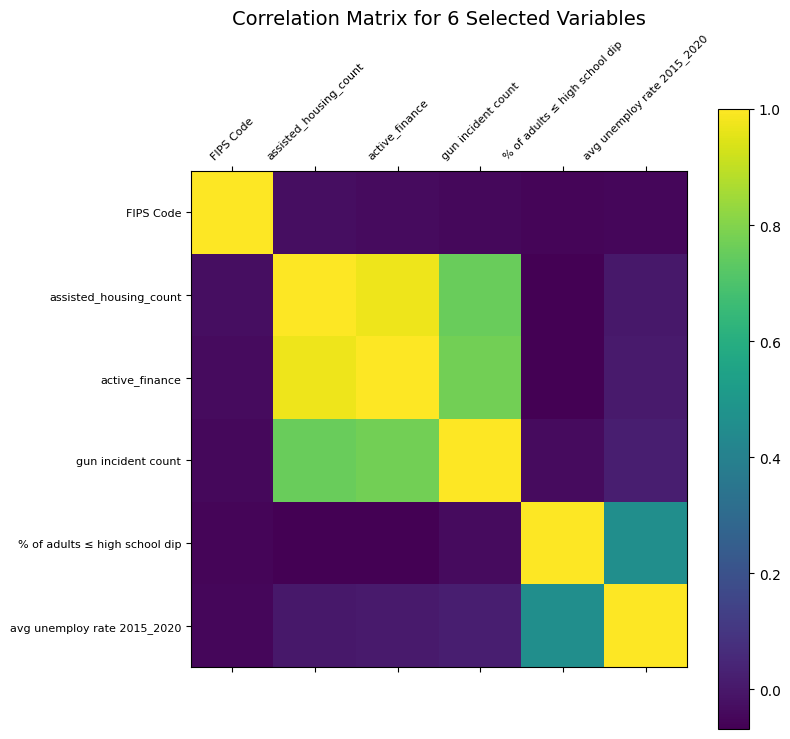

In [51]:
# Create a correlation heatmap for the df_explore dataframe using matplotlib
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_explore.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_explore.shape[1]), df_explore.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df_explore.shape[1]), df_explore.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix for 6 Selected Variables', fontsize=14) # add title

### 3.2.3 Create a correlation heatmap using seaborn

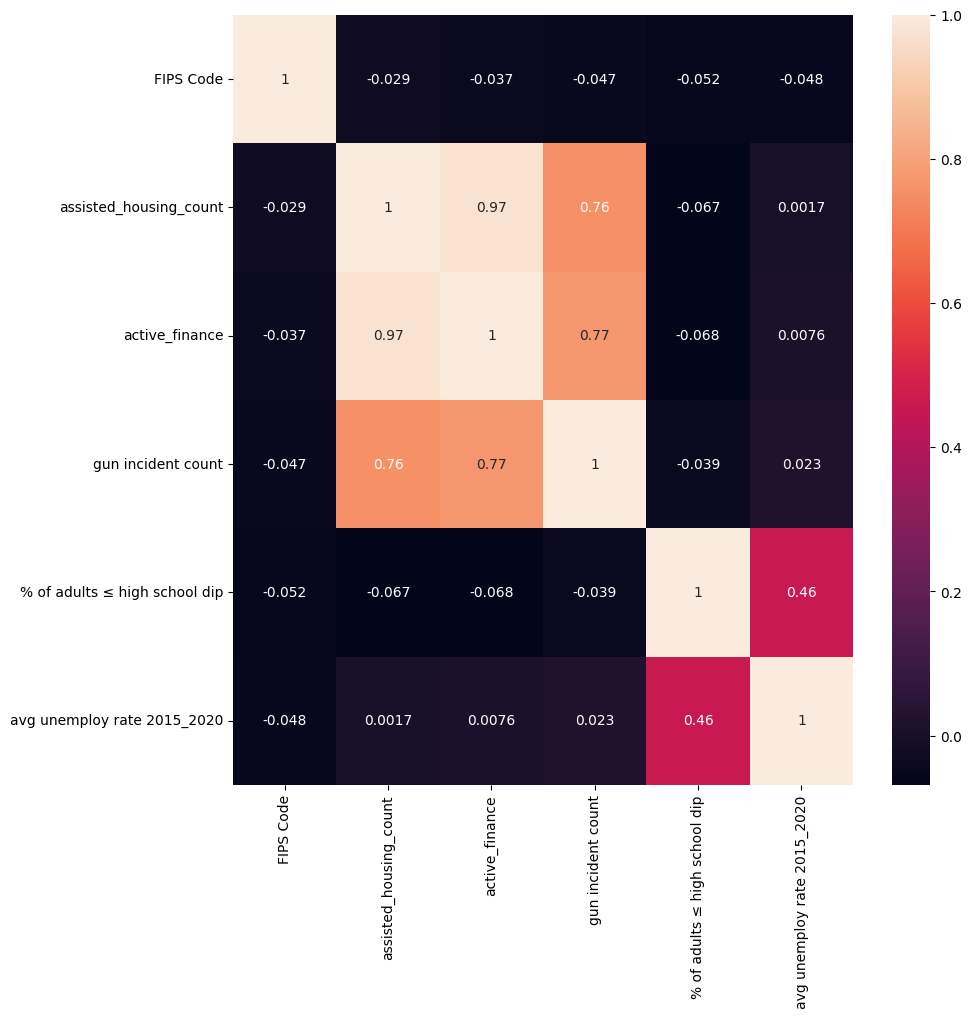

In [52]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_explore.corr(), annot = True, ax = ax)

__Based on the correlation coefficients:__

__1. There is a strong positive relationship between the location of multifamily assisted housing and gun violence incidents with a county as defined by FIPS Codes.__
__This positive relationship is slightly stronger for areas that continue to receive housing assistance - which is a little suprising.__

__2. There is a strong positive relationship between the percentage of adults with less than a high school diploma and the average unemployment rate.  This is not surprising.__   

__3. While it is an extremely weak positive relationship between housing assistance and the unemployment rate, it is nearly 4.5x stronger when the housing assistane is still active.__  

__4. There is no difference in the very weak negative relationship between housing assistance and the percentage of adults with less than a high school diploma when the housing assistance is still active or not.__

### 3.2.3 Create a correlation matrix using just the selected gun violence, education, and unemployment variables

In [53]:
# Check the new dataframe subset
df_explore2.head()

,FIPS Code,gun incident count,% of adults ≤ high school dip,avg unemploy rate 2015_2020
0,1001,40,11.5,4.250000
1,1003,86,9.2,4.533333
2,1005,21,26.8,6.533333
3,1007,8,20.9,5.233333
4,1009,21,19.5,4.216667


In [54]:
# Create the correlation matrix
df_explore2.corr()

,FIPS Code,gun incident count,% of adults ≤ high school dip,avg unemploy rate 2015_2020
FIPS Code,1.000000,-0.045061,-0.016243,-0.068582
gun incident count,-0.045061,1.000000,-0.045078,0.026693
% of adults ≤ high school dip,-0.016243,-0.045078,1.000000,0.401285
avg unemploy rate 2015_2020,-0.068582,0.026693,0.401285,1.000000


### 3.2.4 Create a correlation heatmap for the selected variables

Text(0.5, 1.0, 'Correlation Matrix for Gun Violence, Education, and Unemployment')

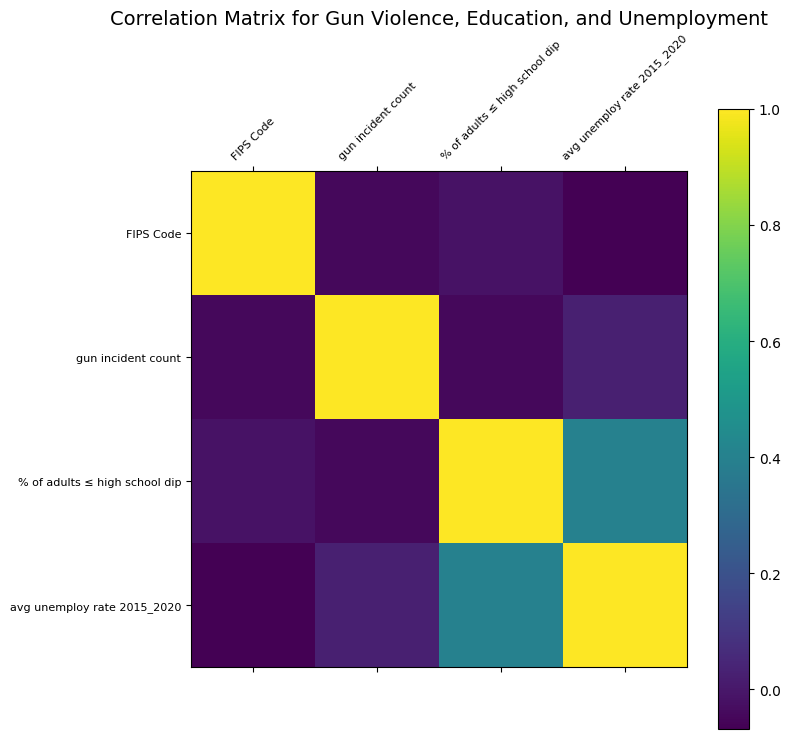

In [55]:
# Create a correlation heatmap for the df_explore2 dataframe using matplotlib
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_explore2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_explore2.shape[1]), df_explore2.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df_explore2.shape[1]), df_explore2.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix for Gun Violence, Education, and Unemployment', fontsize=14) # add title

### 3.2.5 Create a correlation heatmap for gun violence, education, and unemployment variables using seaborn

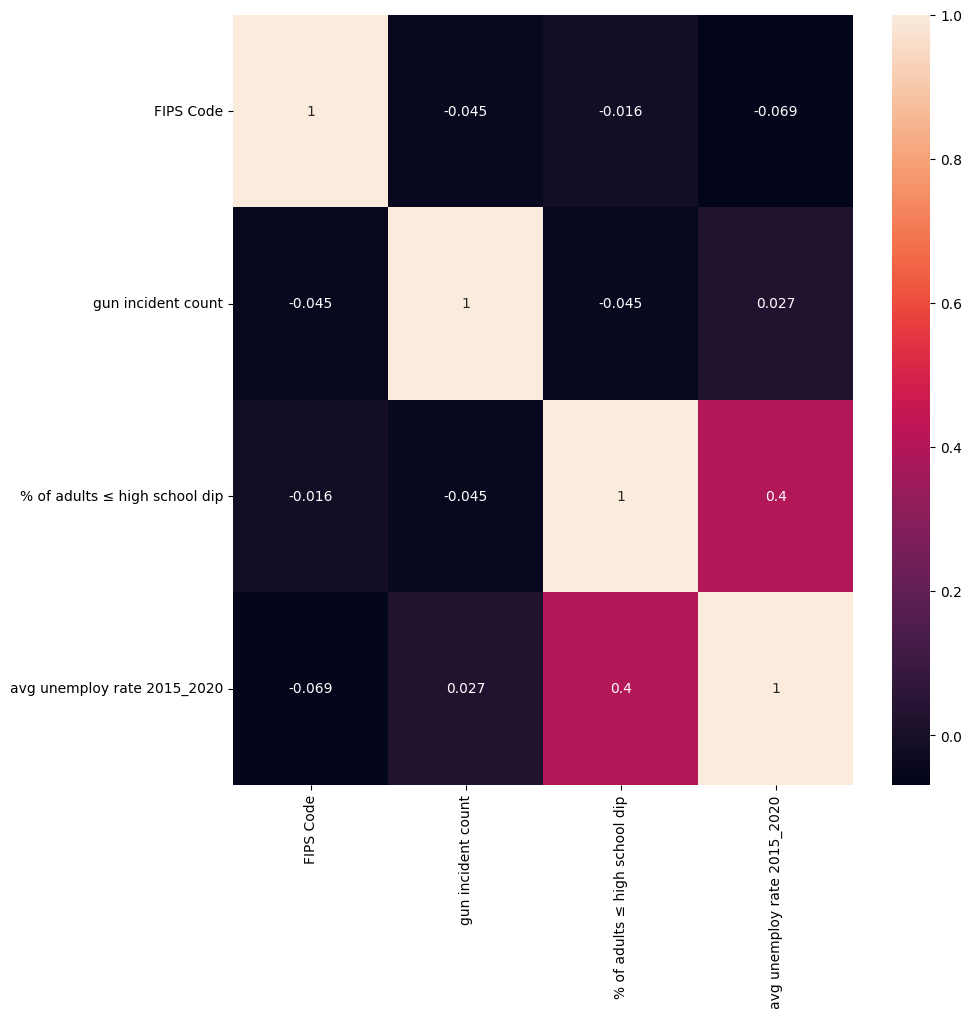

In [56]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr2 = sns.heatmap(df_explore2.corr(), annot = True, ax = ax)

__1. There is a strong positive relationship between the percent of adults with less than a high school diploma and the unemployment rate in a county. This is not surprising.__  

__2. There is only a very, very weak positive relationship between gun violence and the average unemployment and an even weaker negative relationship between gun violence and the percentage of adults with less than a high school diploma.  The abscence of strong relationship is interesting, and while too small to be significant the very wek negative relationship between gun violence and the percentage of adults with less than a high school diploma is intereting.__

# 4. Create scatterplots for the variables with the strongest correlations

## 4.1 Create a scatterplot for gun violence and assisted housing

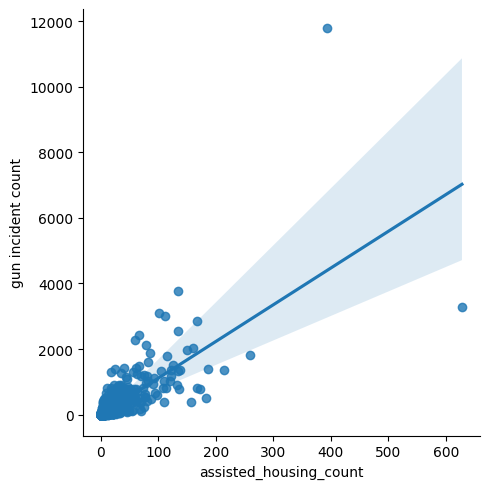

In [57]:
# Create a scatterplot for the assisted housing and gun violence variables in seaborn
sns.lmplot(x = 'assisted_housing_count', y = 'gun incident count', data = df_explore)

__The positive relationship between gun violence and the number of assisted housing properties is strong, but tapers off after ~150 properties (but there are few areas with this density of properities. A more focused look at 0-100 properties might give a clearer picture of the relationship.__

## 4.2 Create a scatterplot for education and unemployment

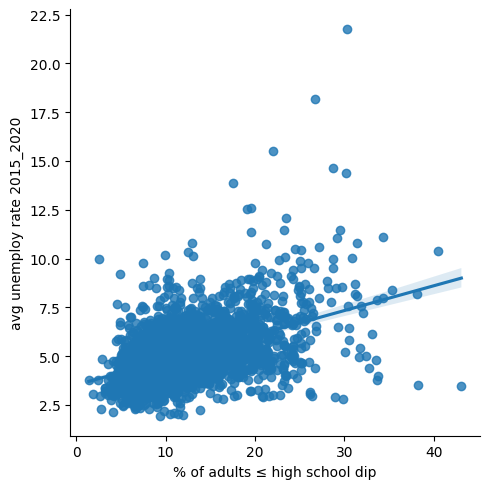

In [58]:
# Create a scatterplot for the assisted housing and gun violence variables in seaborn
sns.lmplot(x = '% of adults ≤ high school dip', y = 'avg unemploy rate 2015_2020', data = df_explore)

__There are outliers of very high unemployment rates and outliers of low unemployment rates with high percentages of adults without high school diplomas (perhaps areas with high concentration of manual labour jobs?) -otherwise the positive correlation would be stronger.__

## 4.3 Create a scatterplot of active housing assistance financing and unemployment rate

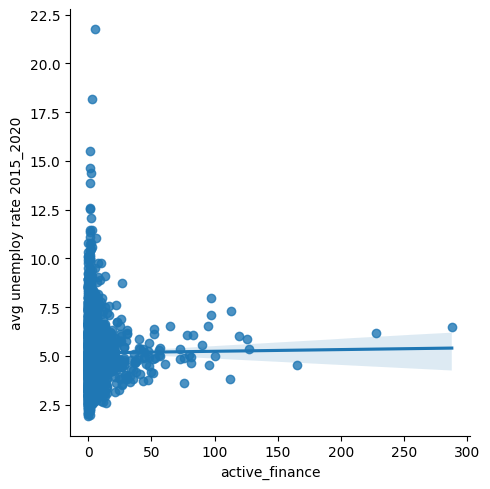

In [59]:
# Create a scatterplot for the assisted housing and gun violence variables in seaborn
sns.lmplot(x = 'active_finance', y = 'avg unemploy rate 2015_2020', data = df_explore)

__While there are many areas with low unemployment rates where these is little active housing assistance, there are fewer higher unemployment rates with more instances of active housing assistance.__ 

# 5. Create a pair plot of the entire data set

## 5.1 Create a pair plot of the 6 selected variables

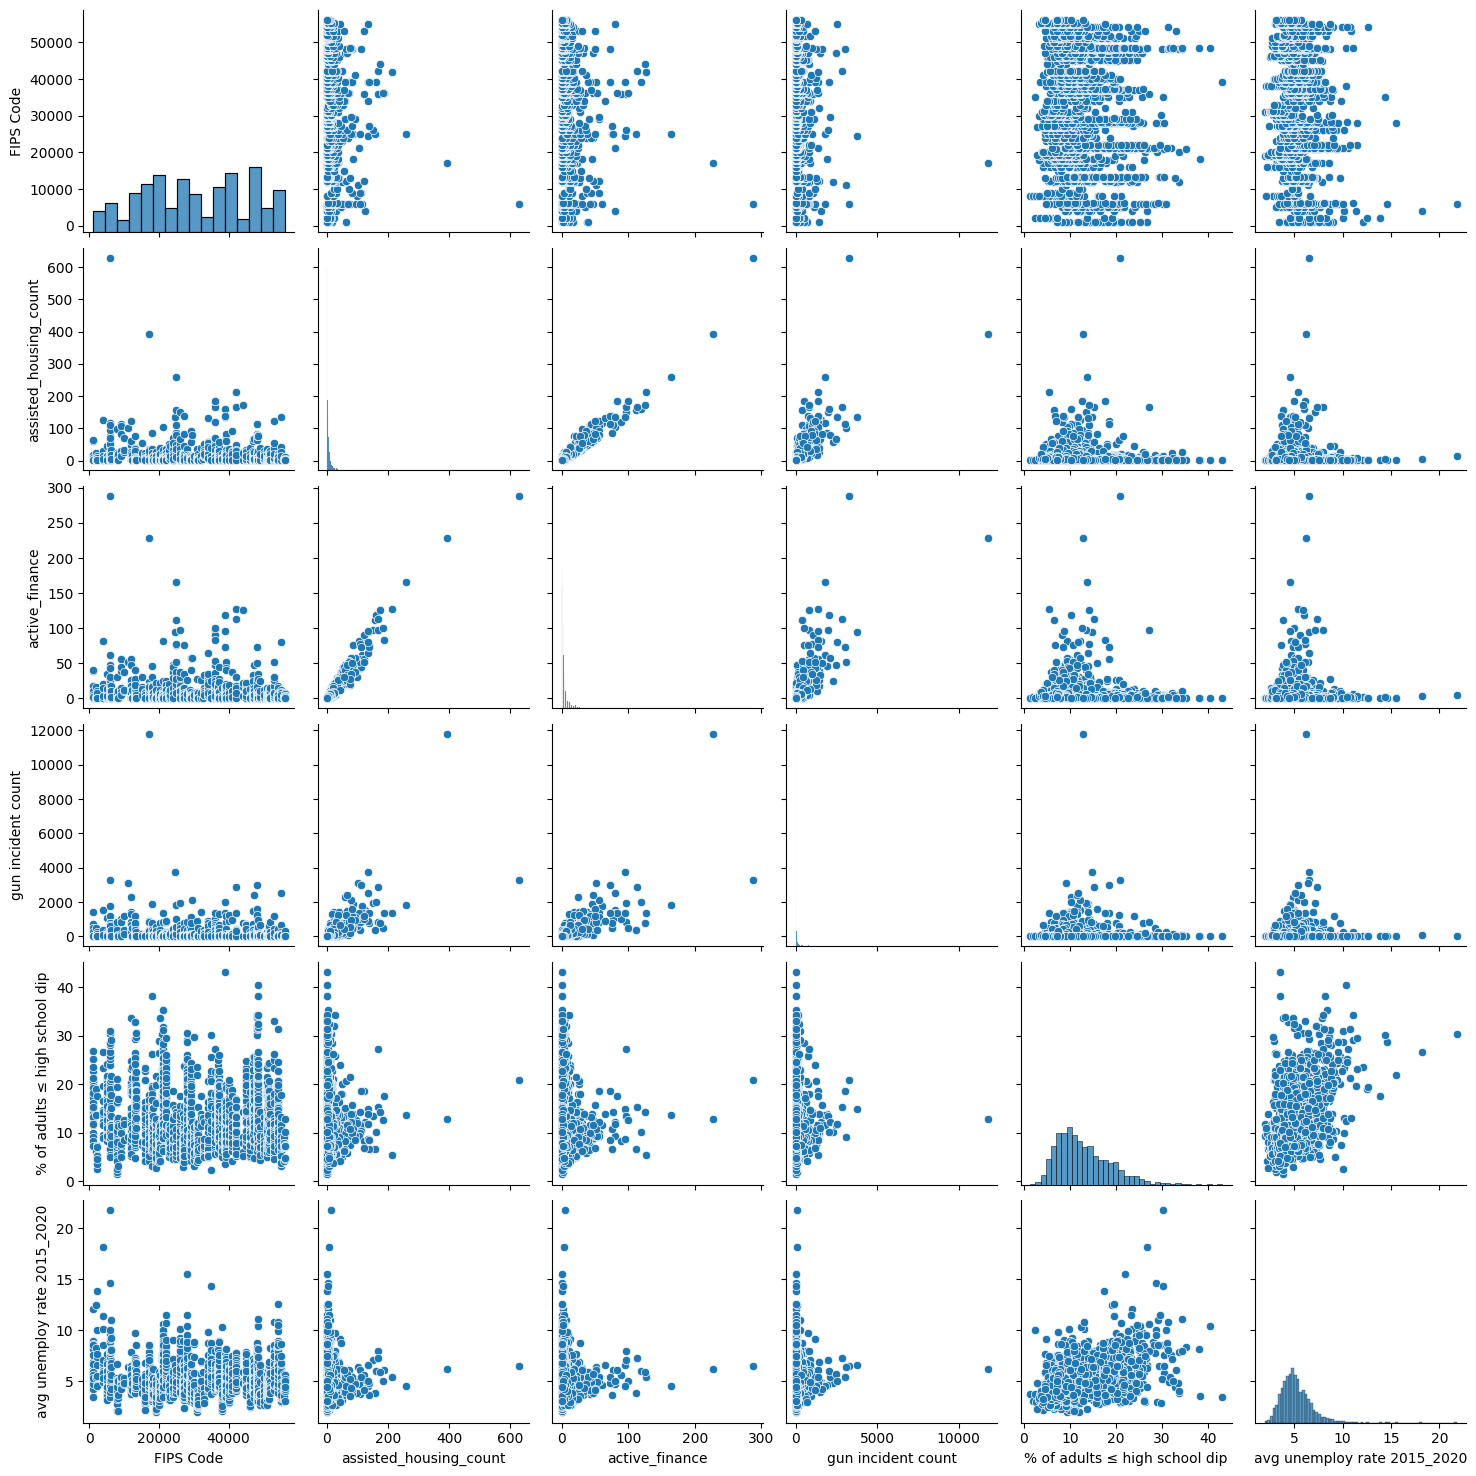

In [60]:
sns.pairplot(df_explore)
plt.show()

## 5.2 Create a pair plot of gun violence, education, and unemployment

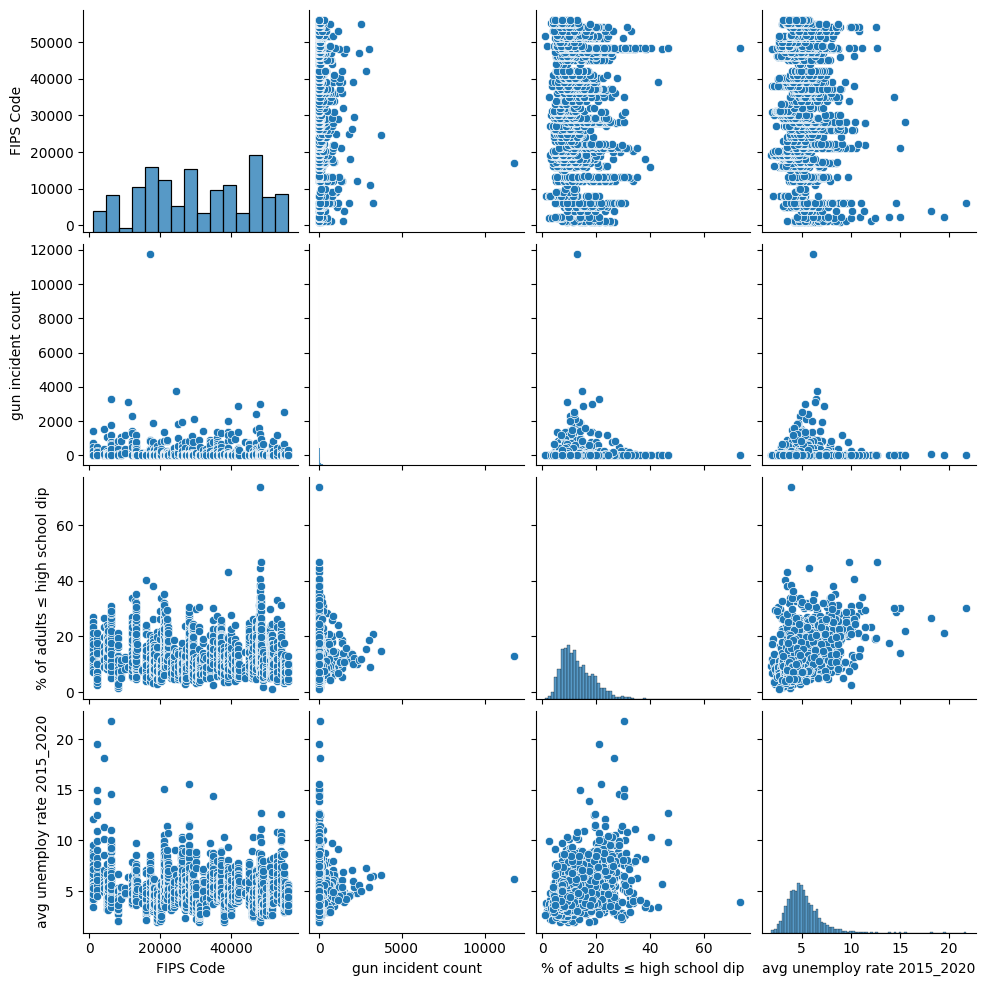

In [61]:
sns.pairplot(df_explore2)

__The variables I would like to explore further are:__  

__1. Assisted housing and gun violence: this was a strong relationship and one that was not necessarily expected. Thre are many factors to consider (housing density where more multifamily housing assistance is provided and more violent crime may take place, etc.) and there is potentially a number of insights that can be learned from further analysis.__  

__2. Active financing for housing assistance and gun violence: I was suprised that this was a stronger positive relationship after seeing the strong positive relationship between housing assistance and gun violence and I believe it should be explored further, particularly looking at how this might have changed over time and if there is any difference in relationship depending on when housing assitance might have ended, etc.__  

__3. Active financing for housing assistance and unemployment: while the correlation coefficient points to a very week (positive) relationship, it is several times stronger than the very week positive relationship with historic housing assistance and unemployment. Look at its distribution in other ways could yield more insights.__  

__4.  % of adults ≤ high school dip and unemployment: while it is the second strongest relationship (strong, positive), I find it is the least interesting in that it would be expected, but there could be more to explore within it - particularly looking at how it changes over time and if there are other influencing factors that might come out after performing a geographical mapping.__  


# 6. Create a categorical plot

## 6.1 Create a categorical plot from the 'assisted_housing_count' variable

<Axes: xlabel='assisted_housing_count', ylabel='Count'>

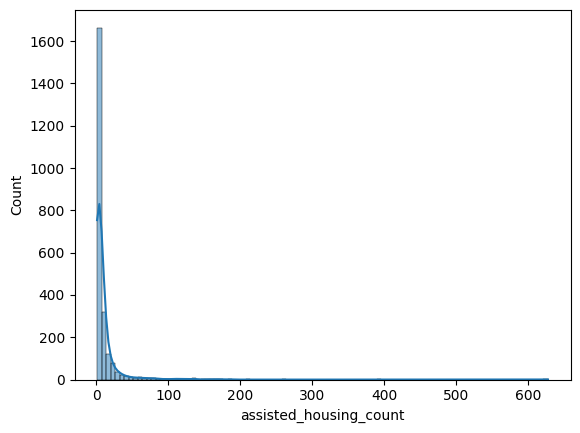

In [62]:
# Create a categorical variable that splits 'assisted_housing_count' into categories
# Create a histogram
sns.histplot(df_explore['assisted_housing_count'], bins = 100, kde = True)

In [63]:
# Create categories
df_explore.loc[df_explore['assisted_housing_count'] < 15, 'Area housing assistance category'] = 'Few properties'
df_explore.loc[(df_explore['assisted_housing_count'] >= 15) & (df_explore['assisted_housing_count'] < 35), 'Area housing assistance category'] = 'Medium properties'
df_explore.loc[df_explore['assisted_housing_count'] >= 35, 'Area housing assistance category'] = 'Many properties'

In [64]:
df_explore['Area housing assistance category'].value_counts(dropna = False)

Area housing assistance category
Few properties       2017
Medium properties     210
Many properties       117
Name: count, dtype: int64

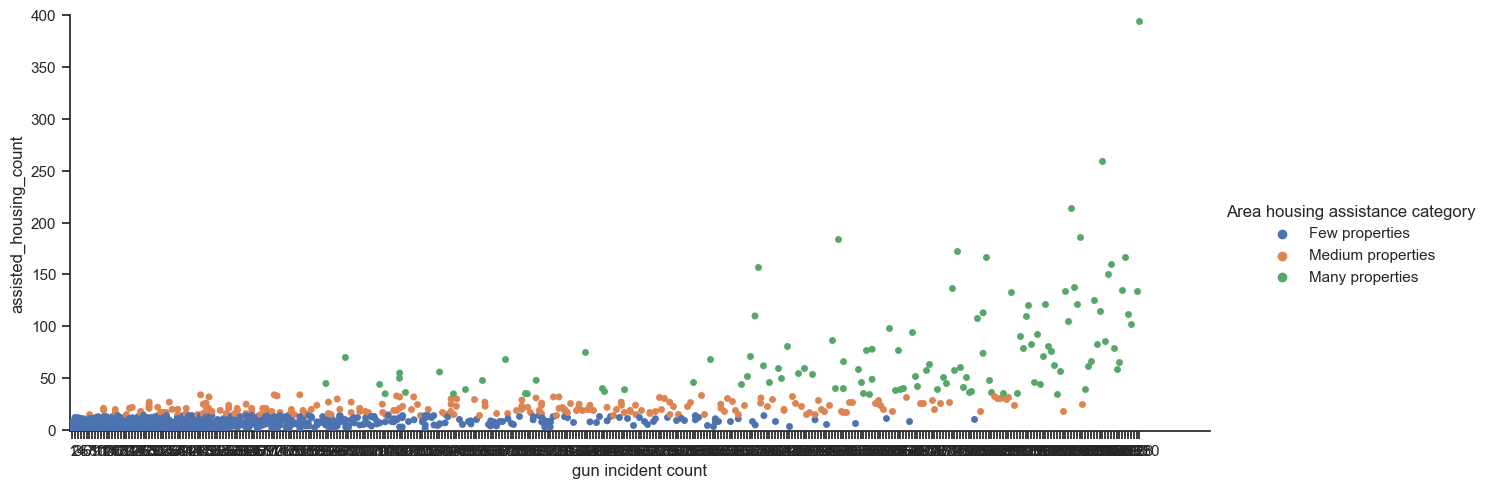

In [65]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style = 'ticks')
sns.catplot(x = 'gun incident count', y = 'assisted_housing_count', hue = 'Area housing assistance category', data=df_explore, aspect=2.5)
sns.set(style='whitegrid')
plt.xlim(-1, 400)
plt.ylim(-1,400)
ax.set_xticks(range(0, len(df_explore['gun incident count']), 200))
plt.show()

__(I am having trouble spreading out or re-sizing the x-axis ('gun incident count'), but it does show that there is a clear correlation with high incidents of gun violence occuring in areas with higher numbers of multifamily assisted housing properties.__

## 6.2 Create a categorical plot from the 'gun incident count' variable

<Axes: xlabel='gun incident count', ylabel='Count'>

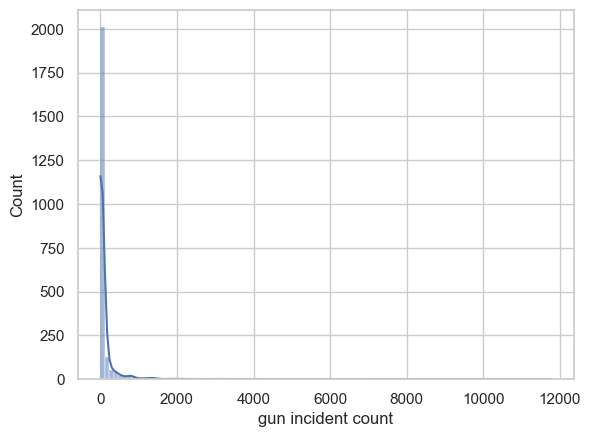

In [66]:
# Create a categorical variable that splits 'gun incident count' into categories
# Create a histogram
sns.histplot(df_explore['gun incident count'], bins = 100, kde = True)

In [67]:
# Create categories
df_explore.loc[df_explore['gun incident count'] < 150, 'Gun incident category'] = 'Few gun incidents'
df_explore.loc[(df_explore['gun incident count'] >= 150) & (df_explore['gun incident count'] < 350), 'Gun incident category'] = 'Regular gun incidents'
df_explore.loc[df_explore['gun incident count'] >= 350, 'Gun incident category'] = 'Many gun incidents'

In [68]:
df_explore['Gun incident category'].value_counts(dropna = False)

Gun incident category
Few gun incidents        2058
Many gun incidents        160
Regular gun incidents     126
Name: count, dtype: int64

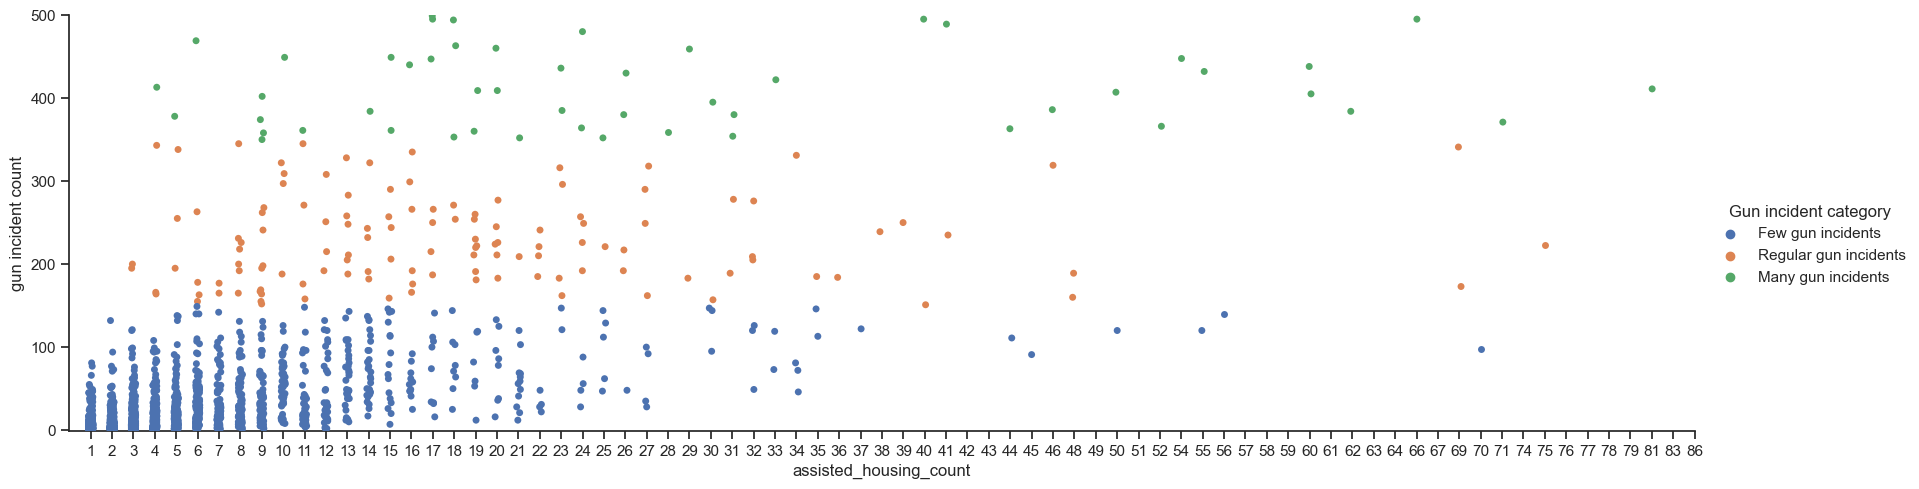

In [69]:
# Create a categorical plot in seaborn using the gun incident categories created above
sns.set(style = 'ticks')
sns.catplot(x = 'assisted_housing_count', y = 'gun incident count', hue = 'Gun incident category', data=df_explore, aspect=3.5)
sns.set(style='whitegrid')
plt.xlim(-1, 75)
plt.ylim(-1,500)
plt.show()

__This also shows the strong positive relationship between gun incidents and areas with more multifamily assisted housing properties. It doesn't show as clear correlation between the three categorical groups as the first categorical plot with the assisted housing property groups, but it could be that with different parameters for gun incident category groups this would change.__ 

In [71]:
# Export df_explore as a csv file (HUD_gun_analysis.csv)
df_explore.to_csv(os.path.join(path, '2_Data', 'Prepared Data', 'HUD_gun_analysis.csv'), index=False)

# 7. Initial question review

__Some answers have been found to the initial questions posed before the visual exploratory analysis:__  

__1. Is there any trend/ difference in gun violence, educational attainment, and/ or unemployment rates for areas that continued to receive multifamily housing assistance and those no longer receive multifamily housing assistance?__  
__- Yes there are differences, which need to be explored further

__2. Is there any relationship with areas that receive multifamily housing assistance and gun violence?__  
__- Yes, there is a strong, positive relationship__  

__3. Is there any relationship with areas that receive multifamily housing assistance and education attainment?__  
__- There is not a significant relationship, but a very weak negative relationship__  

__4. Is there any relationship with areas that receive multifamily housing assistance and unemployment?__  
__- There is not a significant relationship, but a very weak positive relationship__  

__5. Is there any relationship between areas with gun violence and educational attainment?__  
__- There is not a significant relationship, but a very weak negative relationship__  

__6. Is there any relationship between areas with gun violence and unemployment?__  
__- There is not a significant relationship, but a very weak positive relationship__  

__7. Is there any relationship between educational attainment and unemployment?__  
__- Yes, there is a strong, positive relationship__ 


# 8. Draft hypothesis

__Based on the initial exploratory visual analysis, one possible hypothesis is:__  

__- Counties in the United States with more multifamilty assisted housing properties will suffer from higher rates of gun violence than counties with fewer multifamily assisted housing properties__